IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.8002388694832487
124
            분산 비율       기여율     누적기여율
pca1    28.570267  0.378204  0.378204
pca2     2.006778  0.026565  0.404769
pca3     1.091918  0.014454  0.419223
pca4     0.952362  0.012607  0.431830
pca5     0.874703  0.011579  0.443410
...           ...       ...       ...
pca120   0.109853  0.001454  0.794563
pca121   0.109251  0.001446  0.796009
pca122   0.107757  0.001426  0.797436
pca123   0.106330  0.001408  0.798843
pca124   0.105429  0.001396  0.800239

[124 rows x 3 columns]


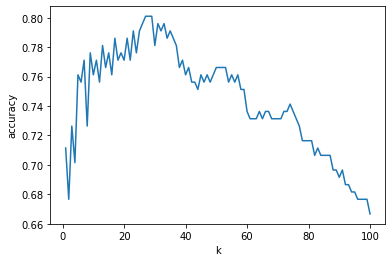

[0.7114427860696517, 0.6766169154228856, 0.7263681592039801, 0.7014925373134329, 0.7611940298507462, 0.7562189054726368, 0.7711442786069652, 0.7263681592039801, 0.7761194029850746, 0.7611940298507462, 0.7711442786069652, 0.7562189054726368, 0.7810945273631841, 0.7661691542288557, 0.7761194029850746, 0.7611940298507462, 0.7860696517412935, 0.7711442786069652, 0.7761194029850746, 0.7711442786069652, 0.7860696517412935, 0.7711442786069652, 0.7910447761194029, 0.7761194029850746, 0.7910447761194029, 0.7960199004975125, 0.8009950248756219, 0.8009950248756219, 0.8009950248756219, 0.7810945273631841, 0.7960199004975125, 0.7910447761194029, 0.7960199004975125, 0.7860696517412935, 0.7910447761194029, 0.7860696517412935, 0.7810945273631841, 0.7661691542288557, 0.7711442786069652, 0.7611940298507462, 0.7661691542288557, 0.7562189054726368, 0.7562189054726368, 0.7512437810945274, 0.7611940298507462, 0.7562189054726368, 0.7611940298507462, 0.7562189054726368, 0.7611940298507462, 0.7661691542288557,

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
# from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
# from pca import pca
# import seaborn as sns

a = np.loadtxt('/content/drive/MyDrive/project2/data3_label.txt', delimiter='\t', dtype='int')
#print(X)
X = a.tolist()
#print(X)
b = np.loadtxt('/content/drive/MyDrive/project2/data3_train.txt', delimiter='\t', dtype='float')
Y = b.tolist()
print(Y)

print(len(Y[0]))  # 데이터셋 피처 수

#scaler = StandardScaler() # 정규화 코드
# scaler = RobustScaler()
# scaler = Normalizer()
scaler = preprocessing.MinMaxScaler()
Y_scaled = scaler.fit_transform(Y)
# print(Y_scaled)

# PCA 적용
pca = PCA(n_components=16)# 처음엔 큰 수(데이터셋마다 차이가 크지만 100~200의 수로 시작)로 설정하고, 누적기여율 확인 후에 수정
#3,4번 데이터셋은 n_components를 너무 크게 잡으면 오류뜸
#3번 데이터셋은 0과 min(n_samples, n_features)=68 사이의 수로 설정
#4번 데이터셋은 0과 min(n_samples, n_features)=72 사이의 수로 설정 //오류 메시지로 범위가 주어지기 때문에 빠르게 수정 가능
Y_transformed_PCA = pca.fit_transform(Y_scaled)

print(sum(pca.explained_variance_ratio_))
print(pca.n_components_)

# 주성분의 누적 기여율 출력, 주성분 개수 결정
result = pd.DataFrame({'분산 비율':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(Y_transformed_PCA.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
print(result)
#누적 기여율이 0.8이 넘을 때 주성분의 개수로 결정
#1번 데이터셋: n_components: 124, k=16, 17, accuracy=0.796
#2번 데이터셋: n_components: 120, k=16~24 사이, accuracy=1.0
#3번 데이터셋: n_components: 16, k=5 이상, accuracy=0.869
#4번 데이터셋: n_components: 15, k=5,6 accuracy=0.841

train_data, test_data, train_labels, test_labels = train_test_split(Y_transformed_PCA, X, test_size=0.2, shuffle=True, random_state=100)

k_list = range(1, 101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    accuracies.append(classifier.score(test_data, test_labels))
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

print(accuracies)

def makeTXT(data, fname, sep):
    file = open(fname, 'w')
    vstr = ''
    for a in data:
        for b in a:
            vstr = vstr + str(b) + sep
        vstr = vstr.rstrip(sep)  # 마지막에도 추가되는  sep을 삭제
        vstr = vstr + '\n'
    file.writelines(vstr)  # 한 라인씩 저장
    file.close()

#print(Y_transformed_PCA)
makeTXT(Y_transformed_PCA, 'data_train.txt', sep='\t')



k=5
classifier = KNeighborsClassifier(n_neighbors=k).fit(train_data, train_labels)
print('accuracy: {0:.3f}'.format(classifier.score(test_data, test_labels)))

